# Apply CNN

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
# Define image size and batch size
IMG_SIZE = (48, 48)
BATCH_SIZE = 64

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    'images/train/',  # Path to train folder
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',  # FER images are grayscale
    class_mode='categorical',
    shuffle=True
)

# Load test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'images/test/',  # Path to test folder
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 emotion classes

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620,935 (2.37 MB)

 Trainable params: 619,975 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [6]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50


C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 71s 149ms/step - accuracy: 0.1760 - loss: 2.8971 - val_accuracy: 0.2653 - val_loss: 1.9920
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 66s 146ms/step - accuracy: 0.2466 - loss: 2.3468 - val_accuracy: 0.3781 - val_loss: 1.6661
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 73s 163ms/step - accuracy: 0.2775 - loss: 2.1498 - val_accuracy: 0.3913 - val_loss: 1.6045
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 73s 163ms/step - accuracy: 0.3021 - loss: 2.0050 - val_accuracy: 0.3982 - val_loss: 1.5765
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 185ms/step - accuracy: 0.3230 - loss: 1.9131 - val_accuracy: 0.4154 - val_loss: 1.5246
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 74s 165ms/step - accuracy: 0.3363 - loss: 1.8308 - val_accuracy: 0.4267 - val_loss: 1.4885
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 67s 149ms/step - accuracy: 0.3520 - loss: 1.7763 - val_accuracy: 0.4294 - val_loss: 1.4631
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 72s 160ms/step - accuracy: 0.3602 - loss: 1.7212 - val

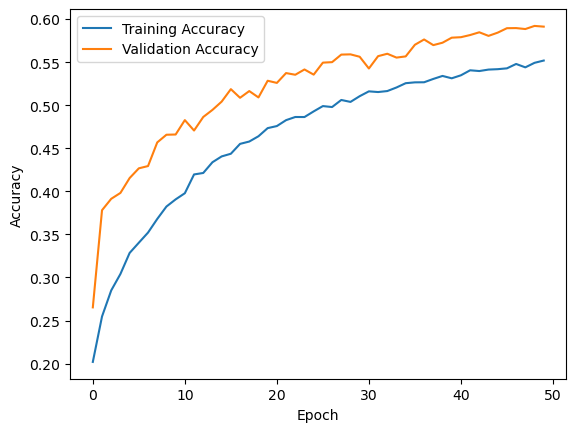

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5224 - loss: 1.2057
Test Accuracy: 59.21%


In [7]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

In [23]:
# Save the final model
# model.save('emotion_model.keras')

# Load the model for predictions
from tensorflow.keras.models import load_model
loaded_model = load_model('emotion_model.keras')
IMG_SIZE= (48,48)

# Example prediction
def predict_emotion(image_path):
    img = tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=IMG_SIZE,
        color_mode='grayscale'
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = loaded_model.predict(img_array)
    emotion_index = np.argmax(prediction)
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    return emotions[emotion_index]

# Test
print(predict_emotion(r"C:\Users\ashis\OneDrive\Desktop\abc.jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Sad


In [18]:
!pip install mediapipe

In [25]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import mediapipe as mp

# Load the trained emotion model
model = load_model('emotion_model.keras')  # Replace with your model path
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
face_detection = mp_face_detection.FaceDetection(
    model_selection=0,  # 0=short-range detection, 1=full-range
    min_detection_confidence=0.5
)

# Start webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR frame to RGB (MediaPipe requirement)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_detection.process(rgb_frame)

    if results.detections:
        for detection in results.detections:
            # Get bounding box coordinates
            bboxC = detection.location_data.relative_bounding_box
            h, w, _ = frame.shape
            x = int(bboxC.xmin * w)
            y = int(bboxC.ymin * h)
            width = int(bboxC.width * w)
            height = int(bboxC.height * h)

            # Extract face ROI (Region of Interest)
            face_roi = frame[y:y+height, x:x+width]

            # Preprocess for emotion model (grayscale + resize)
            gray_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
            resized_face = cv2.resize(gray_face, (48, 48))  # Match model input size
            normalized_face = resized_face / 255.0
            reshaped_face = normalized_face.reshape(1, 48, 48, 1)

            # Predict emotion
            prediction = model.predict(reshaped_face, verbose=0)
            emotion_idx = np.argmax(prediction)
            emotion = emotion_labels[emotion_idx]
            confidence = np.max(prediction) * 100

            # Draw bounding box and label
            cv2.rectangle(frame, (x, y), (x+width, y+height), (0, 255, 0), 2)
            cv2.putText(frame, f"{emotion} ({confidence:.1f}%)", (x, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Display output
    cv2.imshow('Real-Time Emotion Detection (MediaPipe)', frame)

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

In [29]:
import mediapipe as mp
print(mp.__version__)

0.10.20
